# Transfer Learning part 2: Fine Tuning

## Create helper functions

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-08-06 15:58:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-08-06 15:58:41 (79.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
#Import helper functions we're going to use in this notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

## Let's get some data

In [3]:
# Get data (10% of 10 food classes from Food101)
import zipfile

#Download the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

#Unzip the download file
unzip_data('10_food_classes_10_percent.zip')

--2022-08-06 15:58:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  60.8MB/s    in 2.6s    

2022-08-06 15:58:47 (60.8 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
#Check out how many images and subdirectories are in our dataset
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

In [5]:
#Create training and test directory paths
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [6]:
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                           image_size = IMG_SIZE,
                                                                           label_mode='categorical',
                                                                           batch_size = BATCH_SIZE)
test_data= tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size = BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [8]:
#Check out the class name of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
#See an example of a batch of data
for images, labels in train_data_10_percent.take(2):
  print(labels)

tf.Tensor(
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

## Model 0: Buuilding a transfer learning model using the Keras Functional API

In [10]:
#1. Create  base model with tf.keras.application
base_model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=False,
)

#2. Freeze the base model
base_model.trainable = False

#3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224, 3), name='input_layer')


#4. If using ResNet50V2 you will need to normalize inputs (You don't have to for Efficient)
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(input)

#5. Pass the input to base model
x = base_model(inputs)

#6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computation)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

#7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name = 'output_layer')(x)

#8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)


#9. Compile the model
model_0.compile(loss='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["accuracy"])

#10. Fit the model and save its history
history_10_percent = model_0.fit(train_data_10_percent, 
                                 epochs = 5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data,
                                 validation_steps = int(0.25* len(test_data)),
                                 callbacks = [create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent")]
                                 )

16719872/16705208 [==============================] - 0s 0us/step
Saving TensorBoard log files to: transfer_learning/10_percent/20220806-155856
Epoch 1/5
24/24 [==============================] - 29s 248ms/step - loss: 1.8892 - accuracy: 0.4293 - val_loss: 1.3413 - val_accuracy: 0.7237
Epoch 2/5
24/24 [==============================] - 4s 152ms/step - loss: 1.1343 - accuracy: 0.7600 - val_loss: 0.9262 - val_accuracy: 0.7829
Epoch 3/5
24/24 [==============================] - 5s 198ms/step - loss: 0.8237 - accuracy: 0.8120 - val_loss: 0.7252 - val_accuracy: 0.8240
Epoch 4/5
24/24 [==============================] - 4s 154ms/step - loss: 0.6792 - accuracy: 0.8333 - val_loss: 0.6254 - val_accuracy: 0.8536
Epoch 5/5
24/24 [==============================] - 4s 154ms/step - loss: 0.5920 - accuracy: 0.8587 - val_loss: 0.5767 - val_accuracy: 0.8651


In [11]:
#Evaluate on the full dataset
model_0.evaluate(test_data)

79/79 [==============================] - 7s 79ms/step - loss: 0.5995 - accuracy: 0.8496


[0.5994824767112732, 0.8496000170707703]

In [12]:
#Check the layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [13]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [14]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


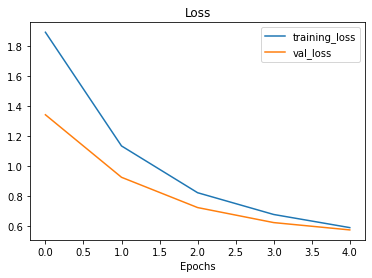

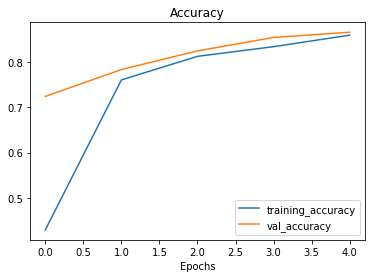

In [15]:
#Check out model training curves
plot_loss_curves(history_10_percent)

## Getting a feature vector from a trained model

In [16]:
#Define the input shape
input_shape = (1,4 , 4, 3)

#Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)

#Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
global_average_pooled_tensor

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [17]:
#Let's replicate the GlobalAveragePool2D layer
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

## Running a series of transfer learning experiments

### 
1. model_1 - use feature extraction transfer learning with 1%  of the training data with data augmentation
2. model_2 - use feature extraction transfer learning with 10% of the training data with data augmentation
3. model_3 - use fine-tuning transfer learning on 10% of the training data with data augmentation
4. model_4 - use fine-tuning transfer learning on 100% of the training data with data augmentation 

### Getting and prepareing data for model 1

In [18]:
# Get data (10% of 10 food classes from Food101)
import zipfile

#Download the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

#Unzip the download file
unzip_data('10_food_classes_1_percent.zip')

--2022-08-06 15:59:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  68.5MB/s    in 1.9s    

2022-08-06 15:59:57 (68.5 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
#Create training and test directory paths
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [20]:
#Check out how many images and subdirectories are in our dataset
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There a

In [21]:
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir_1_percent,
                                                                           image_size = IMG_SIZE,
                                                                           label_mode='categorical',
                                                                           batch_size = BATCH_SIZE)
test_data= tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size = BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmention right into the model
To add data augmentation right into our models, we can use the layers inside:

* tf.keras.layers.experimental.preprocessing() 

In [22]:
from tensorflow.python.ops.gen_array_ops import prevent_gradient
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#Create data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    #preprocessing.Rescale(1./255), #Keep for models like ResNet50V2 but EfficientNet's having rescaling build-in
], name='data_augmentation')

### Visualize our data augmentation layer

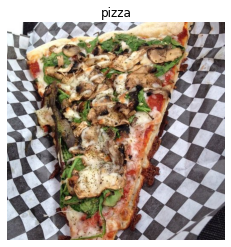

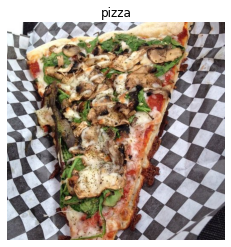

In [23]:
# View a random image and compare it to its augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train" + "/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

#Read and plot in the random image 
img = mpimg.imread(random_image_path)
plt.title(target_class)
plt.axis('off')
plt.imshow(img)

# Now let's plot our augmentated random image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.title(target_class)
plt.axis('off')
plt.imshow(tf.squeeze(augmented_img)/255.)




## Model 1: Feature extraction transfer learning on 1% of data with augmentation

In [24]:
#Setup input shape and base model, freezing the base model layers
input_shape = (224, 224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

#Create input layer
inputs = layers.Input(shape=input_shape, name='input_layer')

#Add in data augmentation Sequential model as a layer 
x = data_augmentation(inputs)

#Give base model, the inputs (after augmentation ) and dont't train it
x=base_model(x, training=False)

#Pool output features of the base model
x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

#Put a dense layer on as the output
x = layers.Dense(20, activation="relu", name="dense_1")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

#Make a model using the inputs and outputs
model_1 = keras.Model(inputs, outputs)


#9. Compile the model
model_1.compile(loss='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["accuracy"])

#10. Fit the model and save its history
history_1_percent = model_1.fit(train_data_1_percent, 
                                 epochs = 25,
                                 steps_per_epoch=len(train_data_1_percent),
                                 validation_data=test_data,
                                 validation_steps = int(0.25* len(test_data)),
                                 callbacks = [create_tensorboard_callback(dir_name="transfer_learning", experiment_name="1_percent_data_aug")]
                                 )

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20220806-160001
Epoch 1/25
3/3 [==============================] - 12s 3s/step - loss: 2.3373 - accuracy: 0.1000 - val_loss: 2.2973 - val_accuracy: 0.1151
Epoch 2/25
3/3 [==============================] - 4s 2s/step - loss: 2.1668 - accuracy: 0.2143 - val_loss: 2.2481 - val_accuracy: 0.1382
Epoch 3/25
3/3 [==============================] - 3s 1s/step - loss: 2.0992 - accuracy: 0.2857 - val_loss: 2.2016 - val_accuracy: 0.1678
Epoch 4/25
3/3 [==============================] - 3s 1s/step - loss: 2.0031 - accuracy: 0.3571 - val_loss: 2.1444 - val_accuracy: 0.1990
Epoch 5/25
3/3 [==============================] - 3s 1s/step - loss: 1.9019 - accuracy: 0.4286 - val_loss: 2.0855 - val_accuracy: 0.2500
Epoch 6/25
3/3 [==============================] - 3s 1s/step - loss: 1.7918 - accuracy: 0.5143 - val_loss: 2.0327 - val_accuracy: 0.2911
Epoch 7/25
3/3 [==============================] - 4s 2s/step - loss: 1.6750 - accuracy: 0.5

In [ ]:
model_1.summary()

In [ ]:
#Evaluate the full dataset
model_1.evaluate(test_data)

In [ ]:
plot_loss_curves(history_1_percent)

## Model 2: feature extraction transfer learning model with 10% of data and data augmentation

In [ ]:
# Get 10% of the data
import zipfile

#Download the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

#Unzip the download file
unzip_data('10_food_classes_10_percent.zip')

#Create training and test directory paths
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
#Set data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir_10_percent,
                                                                           image_size = IMG_SIZE,
                                                                           label_mode='categorical',
                                                                           batch_size = BATCH_SIZE)
test_data= tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size = BATCH_SIZE)

In [ ]:
# How may images are in our directory?
walk_through_dir('10_food_classes_1_percent')

In [ ]:
data_augmentation.summary()

In [ ]:
# Create model 2 with data augmentation build 
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential


#Create data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2),
    #preprocessing.Rescale(1./255), #Keep for models like ResNet50V2 but EfficientNet's having rescaling build-in
], name='data_augmentation')

#Setup input shape and base model, freezing the base model layers
input_shape = (224, 224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False




#Create input layer
inputs = layers.Input(shape=input_shape, name='input_layer')

#Add in data augmentation Sequential model as a layer 
x = data_augmentation(inputs)

#Give base model, the inputs (after augmentation ) and dont't train it
x=base_model(x, training=False)

#Pool output features of the base model
x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

#Put a dense layer on as the output
# x = layers.Dense(20, activation="relu", name="dense_1")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

#Make a model using the inputs and outputs
model_2 = keras.Model(inputs, outputs)



### Create a ModelCheckpoint callback

In [ ]:
# Set checkpoint path
checkpoint_path = "ten_percent_model_checkpoins_weights/checkpoint.ckpt"

#Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path,
    save_weights_only = True,
    save_best_only = False,
    save_freq = "epoch", #Save every epoch
    verbose = 1
)

### Fit model 2 passing in the ModelCheckpoint callback

In [ ]:
#Fit the model saving checkpoits every epoch
initial_epochs = 5

#9. Compile the model
model_2.compile(loss='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["accuracy"])

#10. Fit the model and save its history
history_10_percent_data_aug = model_2.fit(train_data_10_percent, 
                                 epochs = initial_epochs,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data,
                                 validation_steps = int(0.25* len(test_data)),
                                 callbacks = [create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent_data_aug"),
                                              checkpoint_callback]
                                 )


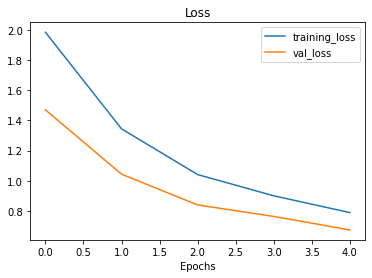

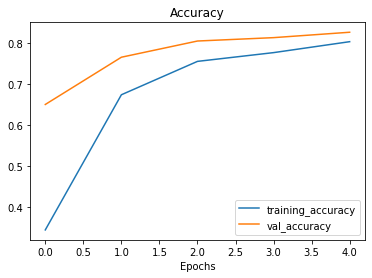

In [ ]:
plot_loss_curves(history_10_percent_data_aug)

### Loading in checkpointed weights

In [ ]:
#Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)

In [ ]:
#Evaluate model_2 with loaded weights
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 0.6853 - accuracy: 0.8232


## Model 3: Fine-tuning an existing model on 10% of the data